In [1]:
import pandas as pd


# 1. ĐỌC DỮ LIỆU


df_patient = pd.read_csv("../data_clean/patient_info_clean.csv")
df_reaction = pd.read_csv("../data_clean/reaction_log_clean.csv")
df_vaccine = pd.read_csv("../data_clean/vaccination_record_clean.csv")




In [3]:
# 1. MERGE: - Merge patient_info với vaccination_record theo patient_id.
import pandas as pd

patients_vaccines = pd.merge(
    df_patient,
    df_vaccine,
    on="patient_id",
    how="left",
    indicator="merge_patient_vaccine"
)
print("\nKết quả hợp patient_into với vacccination_record :")
print(patients_vaccines["merge_patient_vaccine"].value_counts())
display(patients_vaccines.head())


Kết quả hợp patient_into với vacccination_record :
merge_patient_vaccine
both          120
left_only       1
right_only      0
Name: count, dtype: int64


,patient_id,age_group,gender,vaccine_type,dose_number,vaccination_date,merge_patient_vaccine
0,BN500,6-17,F,Covid-19,2.0,2024-04-15,both
1,BN500,6-17,F,MMR,1.0,2024-04-04,both
2,BN500,6-17,F,Covid-19,2.0,NaN,both
3,BN500,6-17,F,DPT,1.0,NaN,both
4,BN500,6-17,F,DPT,NaN,2024-05-11,both


In [4]:
#2. merge thêm: reaction_log -> final_df

import pandas as pd

final_df = pd.merge(
    patients_vaccines,
    df_reaction,
    on="patient_id",
    how="left",
    indicator="merge_reaction"

)
print("\nKết quả merge thêm reaction_log để tạo bảng tổng hợp:")
print(final_df["merge_reaction"].value_counts())
display(final_df.head())


Kết quả merge thêm reaction_log để tạo bảng tổng hợp:
merge_reaction
both          260
left_only      17
right_only      0
Name: count, dtype: int64


,patient_id,age_group,gender,vaccine_type,dose_number,vaccination_date,merge_patient_vaccine,reaction_type,severity,report_date,vaccination_date_min,merge_reaction
0,BN500,6-17,F,Covid-19,2.0,2024-04-15,both,Pain,3.0,NaN,2024-01-17,both
1,BN500,6-17,F,MMR,1.0,2024-04-04,both,Pain,3.0,NaN,2024-01-17,both
2,BN500,6-17,F,Covid-19,2.0,NaN,both,Pain,3.0,NaN,2024-01-17,both
3,BN500,6-17,F,DPT,1.0,NaN,both,Pain,3.0,NaN,2024-01-17,both
4,BN500,6-17,F,DPT,NaN,2024-05-11,both,Pain,3.0,NaN,2024-01-17,both


In [5]:
#3. Phát hiện bệnh nhân thiếu dữ liệu tiêm hoặc thiếu dữ liệu phản ứng

# PHÁT HIỆN THIẾU DỮ LIỆU
import pandas as pd

missing_vaccination = final_df[final_df["merge_patient_vaccine"] == "left_only"][["patient_id"]].drop_duplicates()
missing_reaction = final_df[final_df["merge_reaction"] == "left_only"][["patient_id"]].drop_duplicates()

print("\nBệnh nhân thiếu dữ liệu tiêm :", len(missing_vaccination))
display(missing_vaccination.head())



print("\nBệnh nhân thiếu dữ liệu phản ứng :", len(missing_reaction))
display(missing_reaction.head())




Bệnh nhân thiếu dữ liệu tiêm : 1


,patient_id
59,BN511



Bệnh nhân thiếu dữ liệu phản ứng : 4


,patient_id
12,BN503
145,BN522
227,BN531
241,BN535


In [6]:
#4.Tạo bảng full_outer_merge để liệt kê tất cả bệnh nhân, kể cả những người chỉ có ở 1–2 
#bảng, và phân tích nguyên nhân lệch dữ liệu.
import pandas as pd
full_outer_merge = pd.merge(
    df_patient,
    df_vaccine,
    on="patient_id",
    how="outer",
    indicator="merge_patient_vaccine"
).merge(
    df_reaction,
    on="patient_id",
    how="outer",
    indicator="merge_reaction"
)
for df in [df_patient, df_vaccine, df_reaction]:
    df["patient_id"] = (
        df["patient_id"]
        .astype(str)
        .str.strip()
        .str.upper()
    )
print(df_patient["patient_id"].head())
print("\nKết quả full outer merge:")
print(full_outer_merge[["merge_patient_vaccine", "merge_reaction"]].value_counts())
display(full_outer_merge.head())
    

0    BN500
1    BN501
2    BN502
3    BN503
4    BN504
Name: patient_id, dtype: object

Kết quả full outer merge:
merge_patient_vaccine  merge_reaction
both                   both              258
                       left_only          17
left_only              both                2
Name: count, dtype: int64


,patient_id,age_group,gender,vaccine_type,dose_number,vaccination_date,merge_patient_vaccine,reaction_type,severity,report_date,vaccination_date_min,merge_reaction
0,BN500,6-17,F,Covid-19,2.0,2024-04-15,both,Pain,3.0,NaN,2024-01-17,both
1,BN500,6-17,F,MMR,1.0,2024-04-04,both,Pain,3.0,NaN,2024-01-17,both
2,BN500,6-17,F,Covid-19,2.0,NaN,both,Pain,3.0,NaN,2024-01-17,both
3,BN500,6-17,F,DPT,1.0,NaN,both,Pain,3.0,NaN,2024-01-17,both
4,BN500,6-17,F,DPT,NaN,2024-05-11,both,Pain,3.0,NaN,2024-01-17,both


In [24]:
missing_vaccine = full_outer_merge[full_outer_merge['vaccine_type'].isna()]
missing_react = full_outer_merge[full_outer_merge['reaction_type'].isna()]

print("Số bệnh nhân thiếu dữ liệu tiêm:", len(missing_vaccine))
print("Số bệnh nhân thiếu dữ liệu phản ứng:", len(missing_react))

Số bệnh nhân thiếu dữ liệu tiêm: 2
Số bệnh nhân thiếu dữ liệu phản ứng: 37


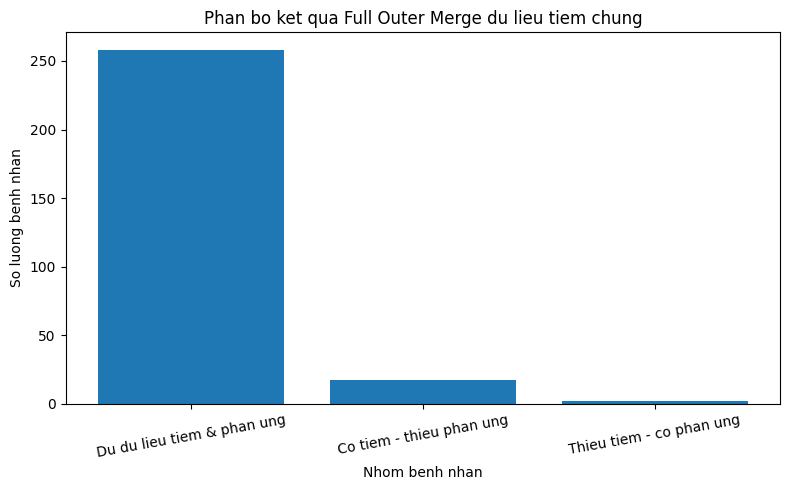

In [7]:
import matplotlib.pyplot as plt

labels = [
    "Du du lieu tiem & phan ung",
    "Co tiem - thieu phan ung",
    "Thieu tiem - co phan ung"
]

values = [258, 17, 2]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel("Nhom benh nhan")
plt.ylabel("So luong benh nhan")
plt.title("Phan bo ket qua Full Outer Merge du lieu tiem chung")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()
